In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# source: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = np.array(df.loc[:, df.columns!='output'])
y = np.array(df['output'])
print(f'shape of X:{X.shape}, y:{y.shape}"')

shape of X:(303, 13), y:(303,)"


In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [5]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

In [6]:
class NeuralNet:
    def __init__(self, lr, x_train, x_test, y_train, y_test):
        self.w = np.random.randn(x_train.shape[1])
        self.b = np.random.randn()
        self.lr = lr
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_train
        self.L_train = []
        self.L_test = []
    
    def activation(self, x):
        '''sigmoid activation'''
        return 1 / (1+np.exp(-x))
    
    def dactivation(self, x):
        '''derivative of sigmoid'''
        return self.activation(x) * (1-self.activation(x))
    
    def forward(self, x):
        '''forward psss'''
        hidden_1 = np.dot(x, self.w) + self.b
        ac_1 = self.activation(hidden_1)
        return ac_1
    
    def backward(self, X, y_true):
        '''backward pass'''
        # calc gradients
        hidden_1 = np.dot(X, self.w) + self.b
        y_pred = self.forward(X)
        dL_dpred = 2 * (y_pred - y_true)
        dpred_dhidden1 = self.dactivation(hidden_1)
        dhidden1_db = 1
        dhidden1_dw = X

        dL_db = dL_dpred * dpred_dhidden1 * dhidden1_db
        dL_dw = dL_dpred * dpred_dhidden1 * dhidden1_dw
        return dL_db, dL_dw
    
    def optimizer(self, dl_db, dl_dw):
        self.b = self.b - lr*dl_db
        self.w = self.w - lr*dl_dw
    
    def train(self, epoches):
        for epoch in range(1, epoches+1):
            # random position
            random_pos = np.random.randint(len(self.x_train))
            
            # forward pass
            y_train_true = self.y_train[random_pos]
            y_train_pred = self.forward(self.x_train[random_pos])
            
            # training loss
            L = np.sum(np.square(y_train_true - y_train_pred))
            self.L_train.append(L)
            
            # gradients
            dl_db, dl_dw = self.backward(self.x_train[random_pos], self.y_train[random_pos])
            
            #  update
            self.optimizer(dl_db, dl_dw)
            
            # error of test data
            L_sum = 0
            for j in range(len(self.x_test)):
                y_true = self.y_test[j]
                y_pred = self.forward(self.x_test[j])
                L_sum += np.square(y_pred - y_true)
            self.L_test.append(L_sum)
            
            if epoch%100 == 0:
                print(f'epoch {epoch}: train loss: {L:.4f}, test loss: {L_sum:.4f}')

In [7]:
lr = 0.1
epoches = 1000

nn = NeuralNet(lr=lr, x_train=x_train_scale, x_test=x_test_scale, y_train=y_train, y_test=y_test)
nn.train(epoches=epoches)

epoch 100: train loss: 0.0013, test loss: 18.9310
epoch 200: train loss: 0.9699, test loss: 22.0241
epoch 300: train loss: 0.0103, test loss: 23.1553
epoch 400: train loss: 0.7932, test loss: 23.6554
epoch 500: train loss: 0.0002, test loss: 24.3942
epoch 600: train loss: 0.0101, test loss: 25.3943
epoch 700: train loss: 0.3602, test loss: 25.9616
epoch 800: train loss: 0.0727, test loss: 25.6033
epoch 900: train loss: 0.0039, test loss: 25.5637
epoch 1000: train loss: 0.0000, test loss: 25.4392


<AxesSubplot:>

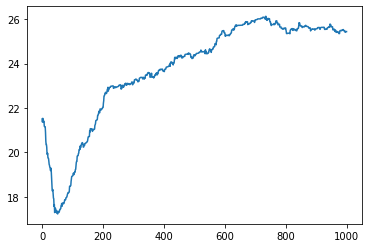

In [8]:
sns.lineplot(x=list(range(len(nn.L_test))), y=nn.L_test)

In [9]:
# iterate over test data
total = x_test_scale.shape[0]
correct = 0
y_preds = []
for i in range(total):
    y_true = y_test[i]
    y_pred = np.round(nn.forward(x_test_scale[i]))
    y_preds.append(y_pred)
    correct += 1 if y_true == y_pred else 0
    
# Calculate Accuracy
acc = correct / total
print(f'test accuracy: {acc}')

test accuracy: 0.8524590163934426


In [10]:
# Baseline Classifier
from collections import Counter
Counter(y_test)

Counter({0: 32, 1: 29})

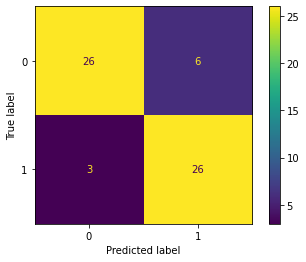

In [11]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_true = y_test, y_pred = y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()